# Basic OSMNx Examples

## CAVEATS for installing OSMNx
OSMNx probably needs its own conda environment, at least based on the [documentation's instructions](https://osmnx.readthedocs.io/en/stable/). However, this should be tested. Ideally OSMNx can work together with arcpy.

## References for OSMNx
* [Documentation](https://osmnx.readthedocs.io/en/stable/)
* [Notebook of examples of OSMNx usage](https://github.com/gboeing/osmnx-examples)
* [API and module reference](https://osmnx.readthedocs.io/en/stable/osmnx.html)


In [1]:
import os

import osmnx as ox
import networkx as nx

## Loading OSM data

### Data for a specific place or city using OSM Nominatim

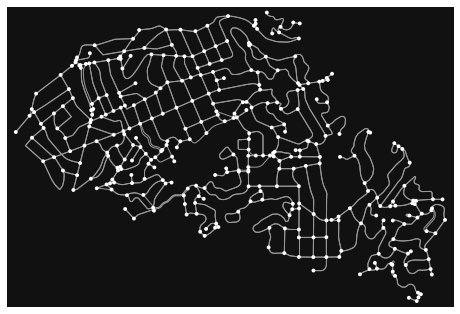

In [2]:
%matplotlib inline
ox.__version__



# download/model a street network for some city then visualize it
# based on OSM nominatim query
G = ox.graph_from_place("Piedmont, California, USA", network_type="drive")
fig, ax = ox.plot_graph(G)





### Get street network for multiple jurisdictions from OSM nominatim
This could be a good method for building a network for the SACOG region.
In the example below, we pull the polygon geographies for several cities in south Placer County, then fetch the street networks for all streets within those polygons.
    

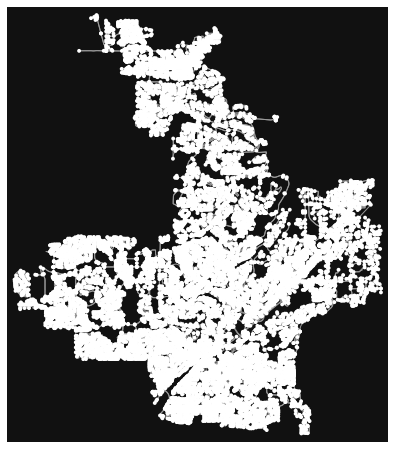

In [17]:
state = "California, USA"
places = ["Roseville", "Lincoln", "Loomis", "Rocklin"]

full_places = [f"{p}, {state}" for p in places]

# make geodataframe of the polygons representing each place's boundaries
south_placer = ox.geocode_to_gdf(full_places)
# south_placer = ox.project_gdf(south_placer)

# option to plot them here
# ax = south_placer.plot(fc="gray", ec="none")

sp_poly = south_placer.geometry.unary_union

g_south_placer = ox.graph_from_polygon(sp_poly, network_type="drive_service")
fig, ax = ox.plot_graph(g_south_placer)

### Load street network from saved OSM network or other saved file
If we want to use OSMNx in end-user tools, we want ultimate reliability, thus it is ideal to be able to pull the network from a local file rather than from OSM directly. Plus, for large street networks, IN THEORY it is faster to load the network from a local file rather than directly from OSM

